# TAREA NO. 3 - ESTADÍSTICA MULTIVARIADA: REGRESIÓN MULTIVARIADA

## 1. Contexto de la base de datos
Este conjutno de datos contiene seis meses de datos de consumo eléctrico de un hogar, recogidos entre enero y junio de 2007. Los datos incluyen información sobre potencia activa global, potencia reactiva global, tensión, intensidad global, submedición 1 (cocina), submedición 2 (lavadero) y submedición 3 (calentador de agua eléctrico y aire acondicionado). Con 260.640 mediciones en total, el objetivo es predecir o estimar el consumo eléctrico de los hogares.

| Nombre de la columna | Descripción |
| --- | --- |
| Fecha | La fecha de la observación. (Fecha) |
| Hora | La hora de la observación. (Hora) |
| Potencia_activa_global | La potencia activa total consumida por el hogar (kilovatios). (Numérico) |
| Potencia_reactiva_global | La potencia reactiva total consumida por el hogar (kilovatios). (Numérico) |
| Voltaje | El voltaje al cual se entrega la electricidad al hogar (voltios). (Numérico) |
| Intensidad_global | La intensidad de corriente promedio entregada al hogar (amperios). (Numérico) |
| Sub_medición_1 | La potencia activa consumida por la cocina (kilovatios). (Numérico) |
| Sub_medición_2 | La potencia activa consumida por la lavandería (kilovatios). (Numérico) |
| Sub_medición_3 | La potencia activa consumida por el calentador de agua eléctrico y el aire acondicionado (kilovatios). (Numérico) |

La variable respuesta para el modelo de regresión múltiple es la potencia aparente global en la red. A priori, esta variable no está incluida dentro del conjunto de datos, por lo que es necesario obtenerla a parir de la potencia reactiva y activa global que si están disponibles en el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-procesamiento de los datos

In [2]:
df = pd.read_csv('household_power_consumption.csv')
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [3]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df = df.set_index('Datetime')
df_exog = df.iloc[:, 5:]
df = df.iloc[:, 3:4]
df.head()

C:\Users\kevinm\AppData\Local\Temp\ipykernel_19384\353866974.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)


,Global_active_power
Datetime,
2007-01-01 00:00:00,2.58
2007-01-01 00:01:00,2.552
2007-01-01 00:02:00,2.55
2007-01-01 00:03:00,2.55
2007-01-01 00:04:00,2.554


In [4]:
df_exog.head()

,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,
2007-01-01 00:00:00,241.97,10.6,0,0,0.0
2007-01-01 00:01:00,241.75,10.4,0,0,0.0
2007-01-01 00:02:00,241.64,10.4,0,0,0.0
2007-01-01 00:03:00,241.71,10.4,0,0,0.0
2007-01-01 00:04:00,241.98,10.4,0,0,0.0


In [5]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

In [6]:
for i in df_exog.columns:
    df_exog[i] = pd.to_numeric(df_exog[i], errors='coerce')

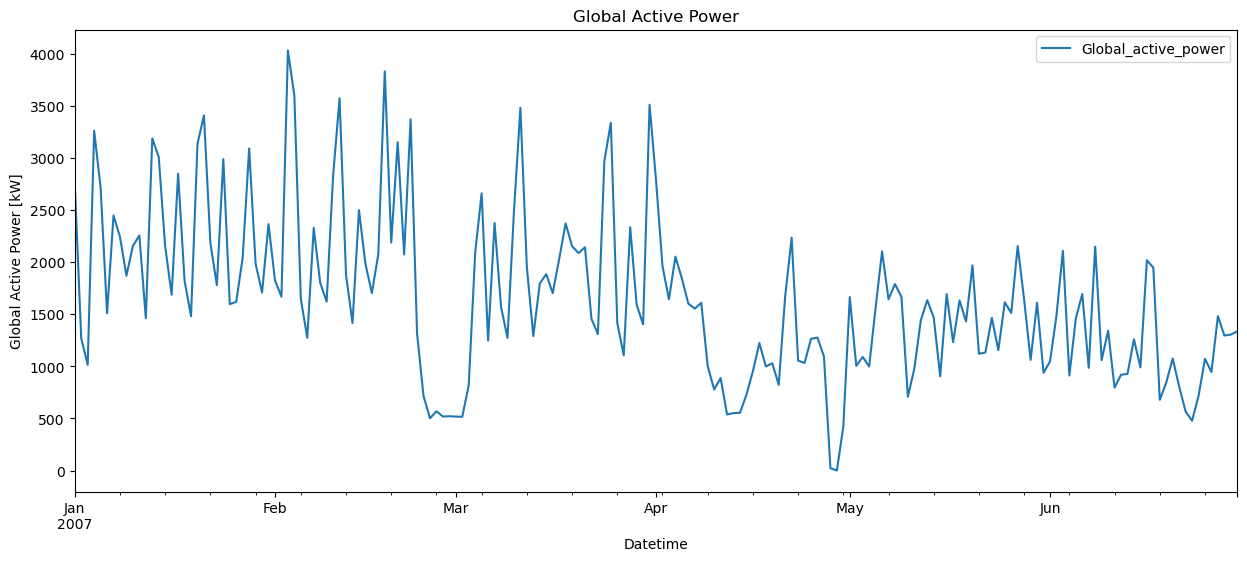

In [7]:
# Resampling data over day
df = df.resample('D').sum()
df_exog = df_exog.resample('D').sum()

# Plotting
df.plot(figsize=(15, 6), title='Global Active Power')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.show()

In [8]:
df.head()

,Global_active_power
Datetime,
2007-01-01,2749.004
2007-01-02,1269.236
2007-01-03,1014.054
2007-01-04,3259.412
2007-01-05,2713.364


In [9]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller aumentada para estacionariedad
adf_test = adfuller(df, autolag='AIC')

# Extraer resultados
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

# Mostrar resultados
{
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Critical Values": critical_values,
}

{'ADF Statistic': -2.8559989683250664,
 'p-value': 0.050709198028531556,
 'Critical Values': {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705}}

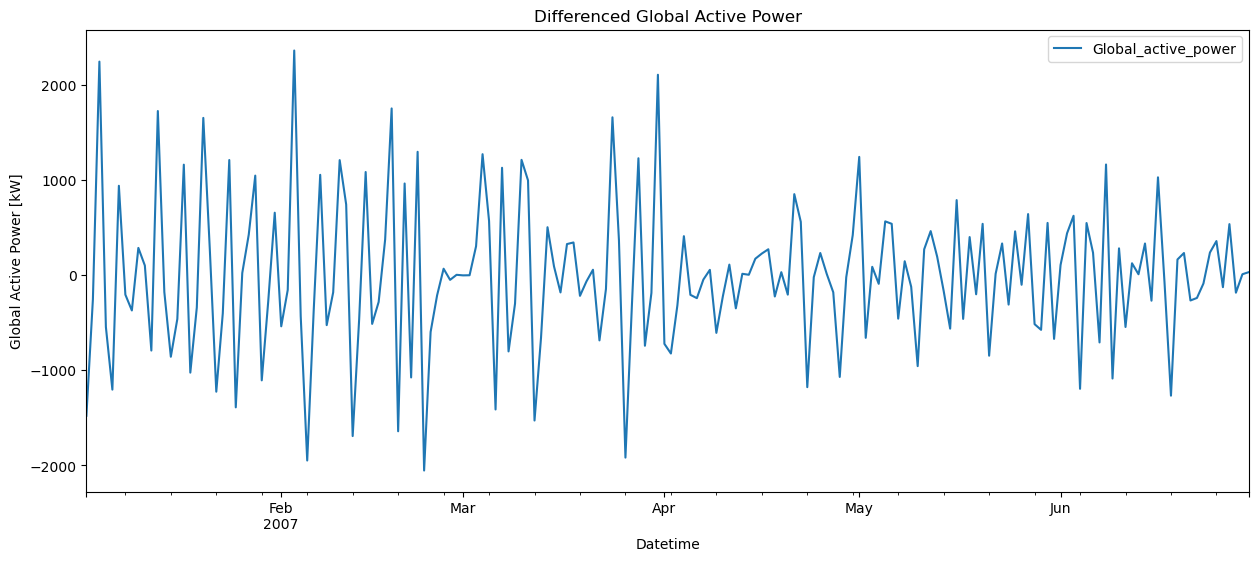

{'ADF Statistic': -6.432525095309374,
 'p-value': 1.6836123429635303e-08,
 'Number of Lags Used': 11,
 'Number of Observations Used': 168,
 'Critical Values': {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004}}

In [10]:
# Differentiate the series to achieve stationarity (if needed)
data_diff = df.diff().dropna()

# Perform ADF test on the differenced series
result_diff = adfuller(data_diff)

# Plot the differenced series
data_diff.plot(figsize=(15, 6), title='Differenced Global Active Power')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.show()

# Display ADF test results for the differenced series
adf_diff_results = {
    'ADF Statistic': result_diff[0],
    'p-value': result_diff[1],
    'Number of Lags Used': result_diff[2],
    'Number of Observations Used': result_diff[3],
    'Critical Values': result_diff[4]
}
adf_diff_results

El p-valor es extremadamente bajo, lo que significa que ahora podemos rechazar la hipótesis nula (H₀). La serie diferenciada es estacionaria.

In [11]:
train_size = int(len(df) * 0.9)

train = df[:train_size]
test = df[train_size:]

train_exog = df_exog[:train_size]
test_exog = df_exog[train_size:]

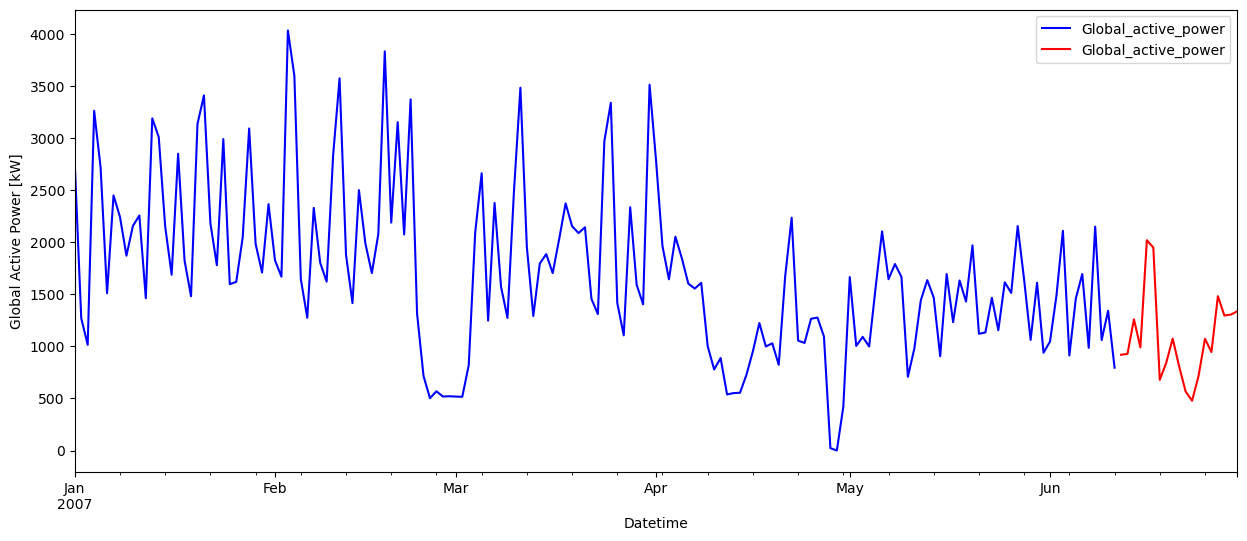

In [12]:
plt.figure(figsize=(15, 6))
train.plot(ax=plt.gca(), color='b', label='Train')
test.plot(ax=plt.gca(), color='r', label='Test')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend(loc='best')
plt.show()

In [13]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(
    train,
    seasonal=False,
    stationary=False,
    stepwise=True, 
    trace=True, 
    error_action='ignore', 
    suppress_warnings=True,
    max_p=5, max_q=5, max_d=2
)

best_params = auto_arima_model.get_params()
best_params

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2565.405, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2619.126, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2608.710, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2574.104, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2617.164, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2565.556, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2549.173, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2545.289, Time=0.20 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2543.136, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=2543.959, Time=0.27 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=2546.539, T

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

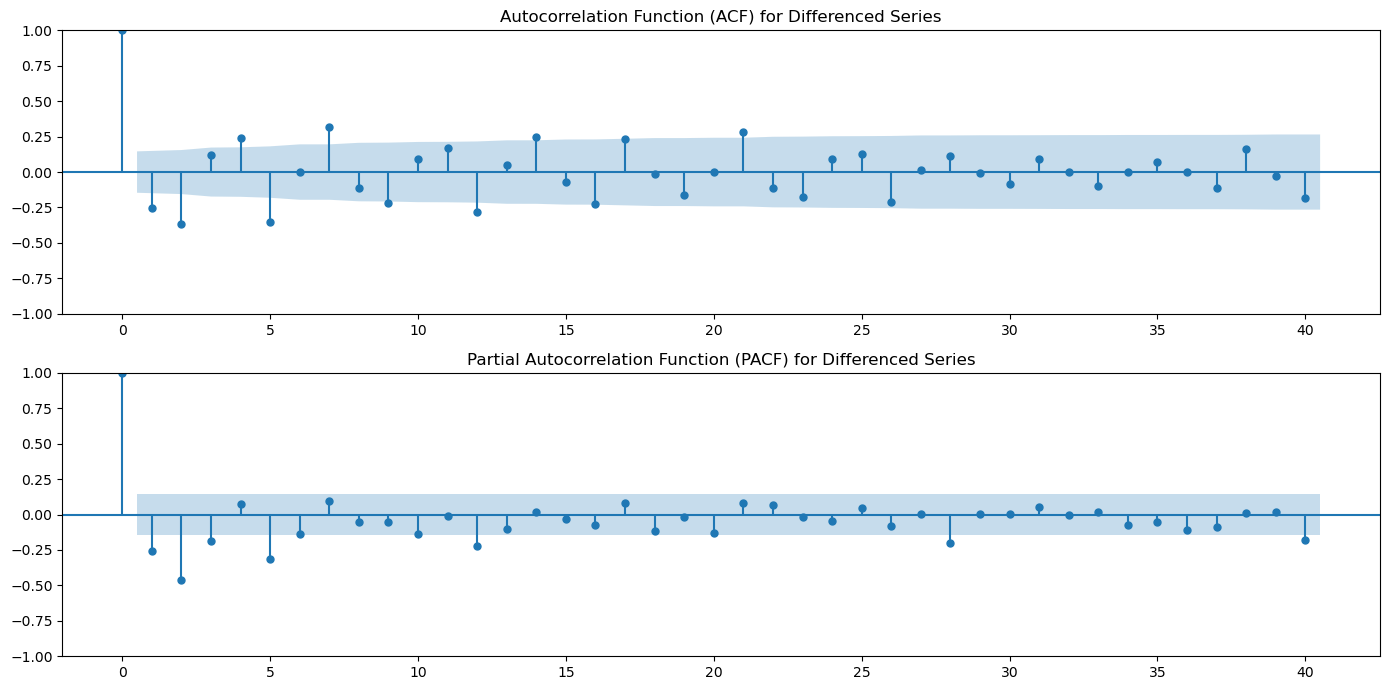

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the original series and differenced series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plot_acf(data_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF) for Differenced Series')

plt.subplot(2, 1, 2)
plot_pacf(data_diff, ax=plt.gca(), lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) for Differenced Series')

plt.tight_layout()
plt.show()

## Modelo ARIMA

### 1. Sin variables exógenas

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

model = ARIMA(train, order=best_params['order'], seasonal_order=best_params['seasonal_order'])
model_fit = model.fit()

c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


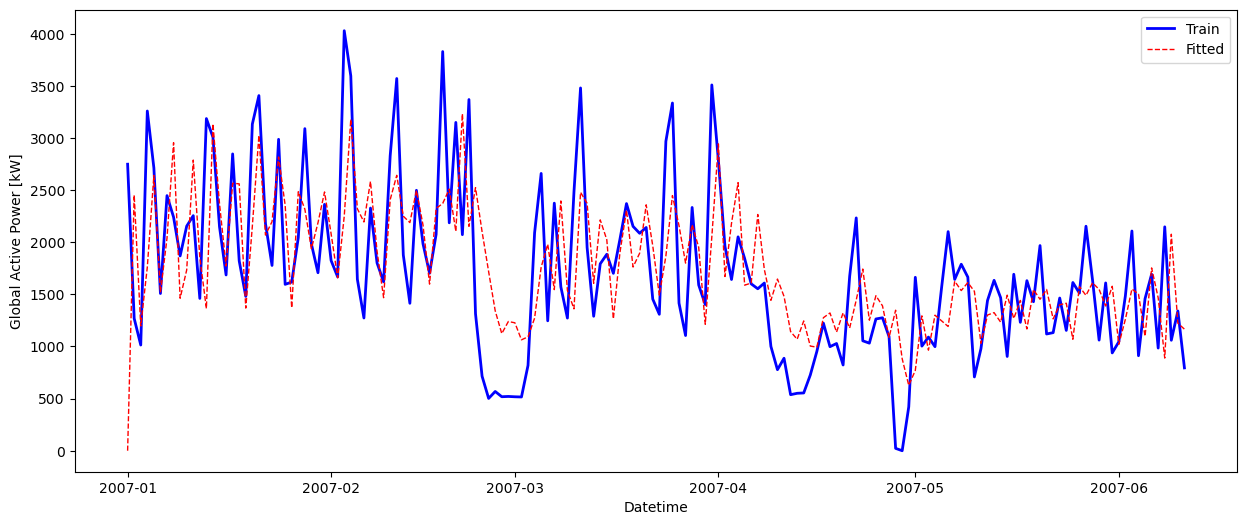

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted', linestyle='--', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

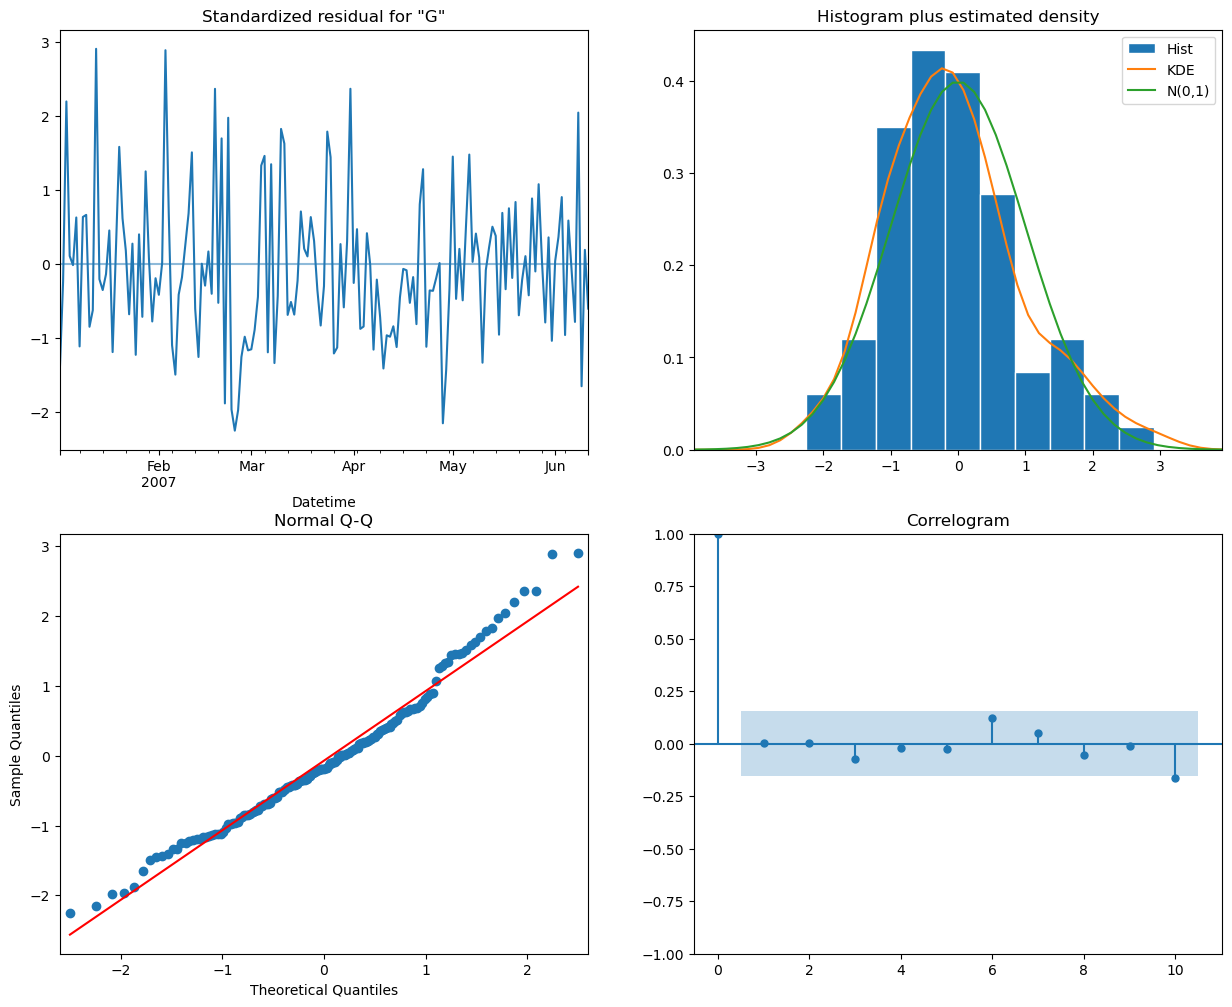

In [17]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

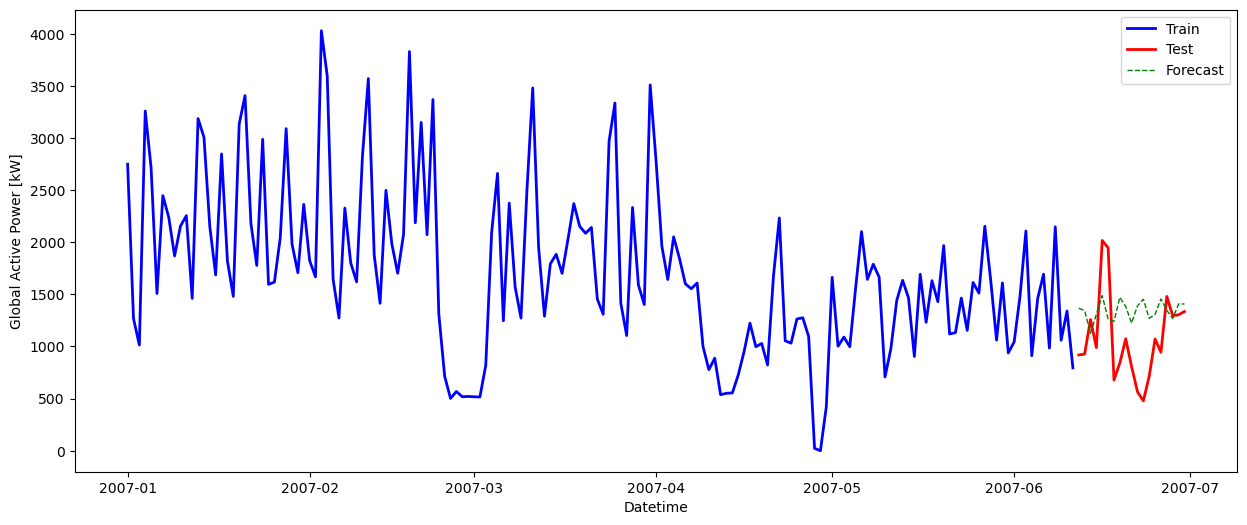

In [18]:
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(test, color='red', linewidth=2, label='Test')
plt.plot(test.index, forecast, color='green', linewidth=1, label='Forecast', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

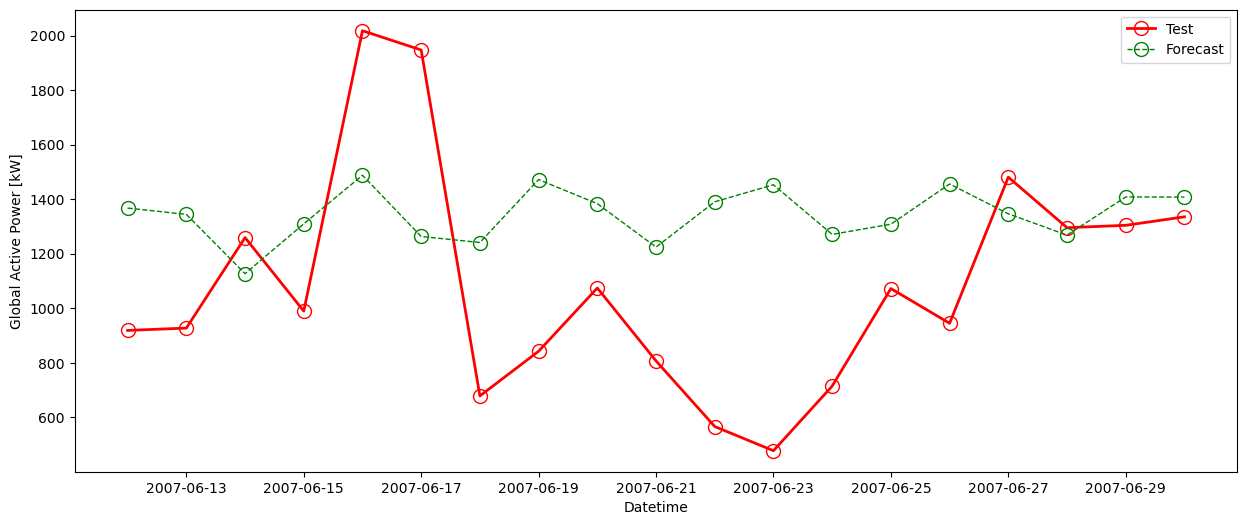

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(test, color='red', linewidth=2, label='Test', marker='o', markersize=10, markerfacecolor='none')
plt.plot(test.index, forecast, color='green', linewidth=1, linestyle='--', label='Forecast', marker='o', markersize=10, markerfacecolor='none')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

In [20]:
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae:.4f} kilowatts')

Mean Absolute Error: 415.3093 kilowatts


### 2. Rrediciendo un valor a la vez y re-entrenando

In [21]:
preds = []
true = []

train_copy = train.copy()

for i in range(len(test)):
    model = ARIMA(train_copy.values, order=best_params['order'], seasonal_order=best_params['seasonal_order'])
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    preds.append(forecast)
    true.append(test.iloc[i])
    train_copy.loc[len(train)] = test.iloc[i]

c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 303.3066 kilowatts


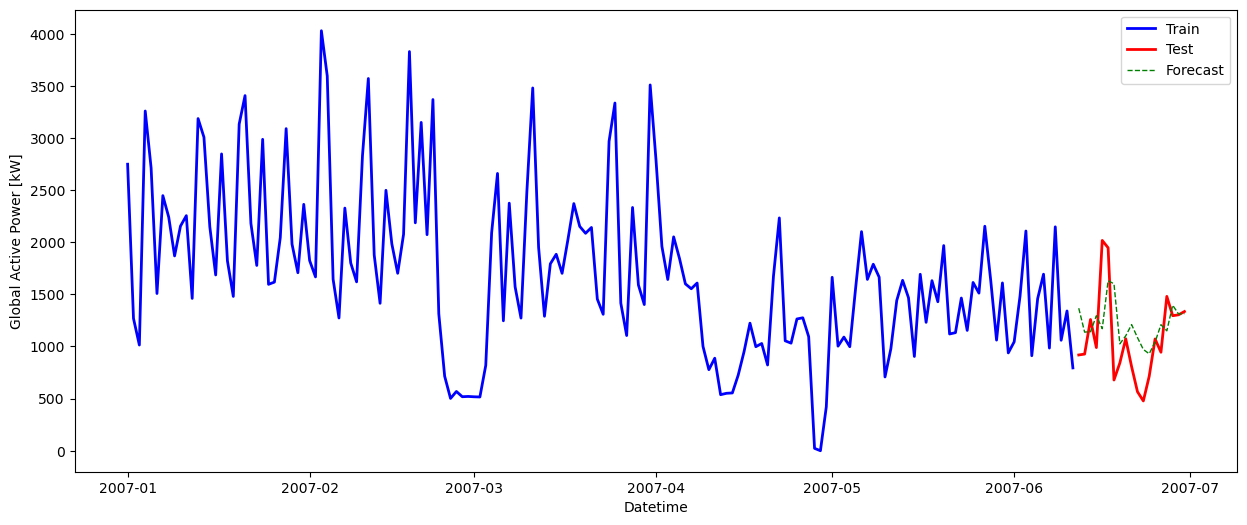

In [22]:
mae = mean_absolute_error(true, preds)
print(f'MAE: {mae:.4f} kilowatts')

plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(test.index, true, color='red', linewidth=2, label='Test')
plt.plot(test.index, preds, color='green', linewidth=1, label='Forecast', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

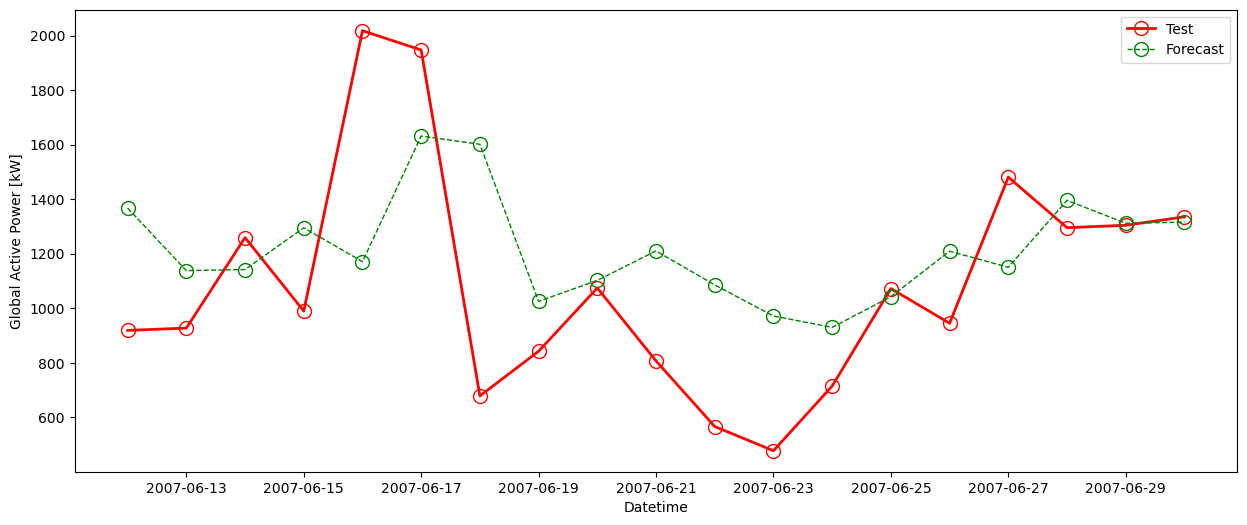

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(test.index, true, color='red', linewidth=2, label='Test', marker='o', markerfacecolor='none', markersize=10)
plt.plot(test.index, preds, color='green', linewidth=1, linestyle='--', label='Forecast', marker='o', markerfacecolor='none', markersize=10)
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

### 3. Usando las variables exógenas

In [24]:
model = ARIMA(train, order=best_params['order'], seasonal_order=best_params['seasonal_order'], exog=train_exog)
model_fit = model.fit()

c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


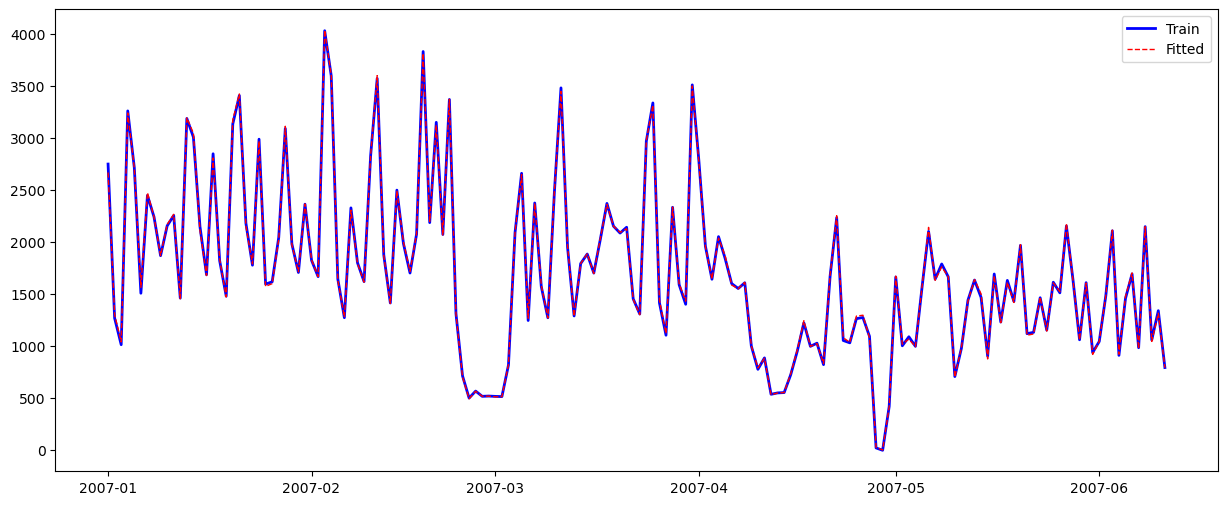

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted', linestyle='--', linewidth=1)
plt.legend()
plt.show()

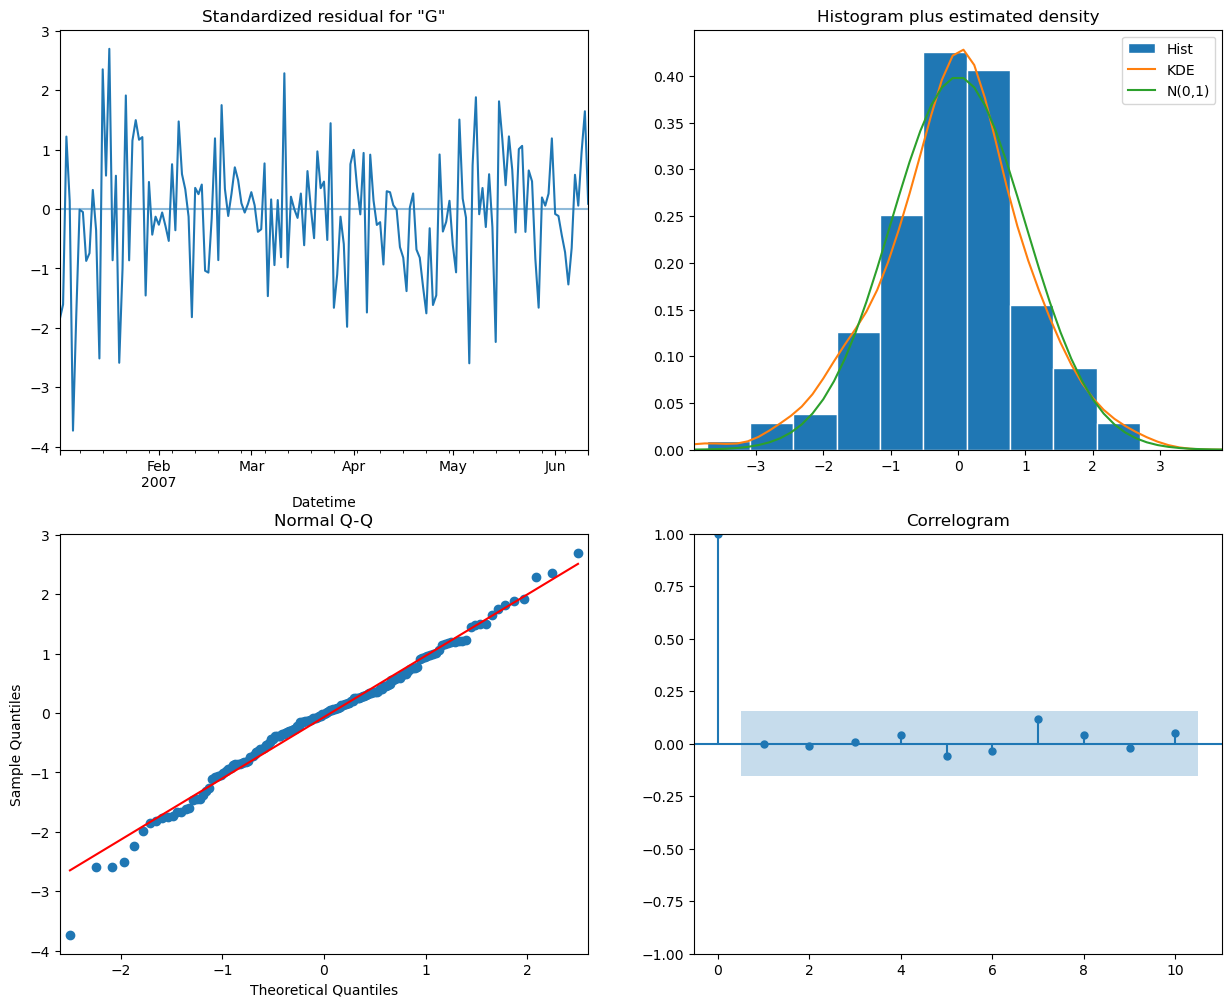

In [26]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

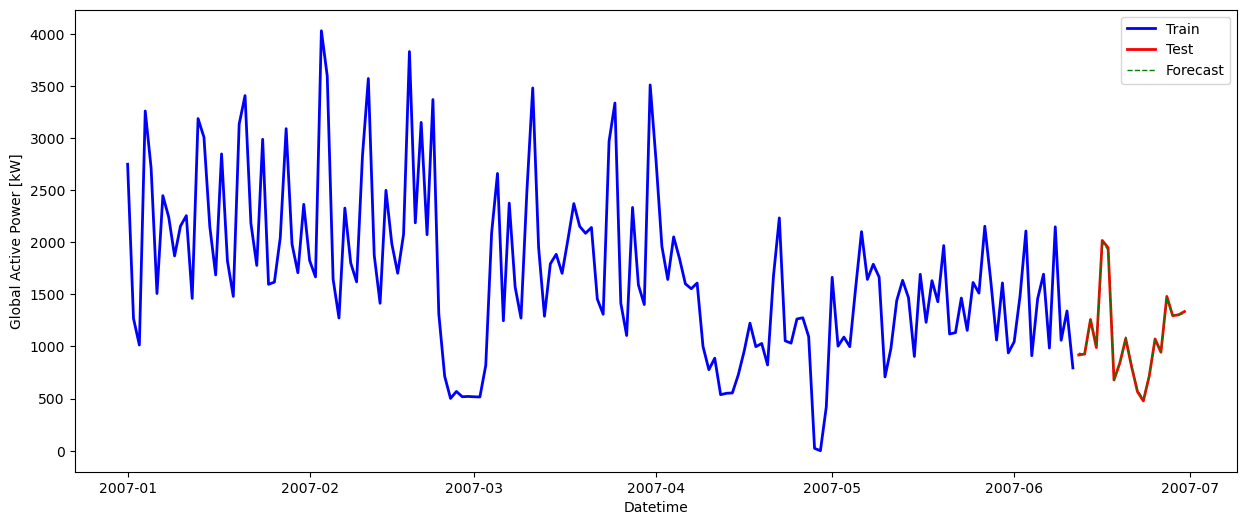

In [27]:
forecast = model_fit.forecast(steps=len(test), exog=test_exog)

plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(test, color='red', linewidth=2, label='Test')
plt.plot(test.index, forecast, color='green', linewidth=1, linestyle='--', label='Forecast')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

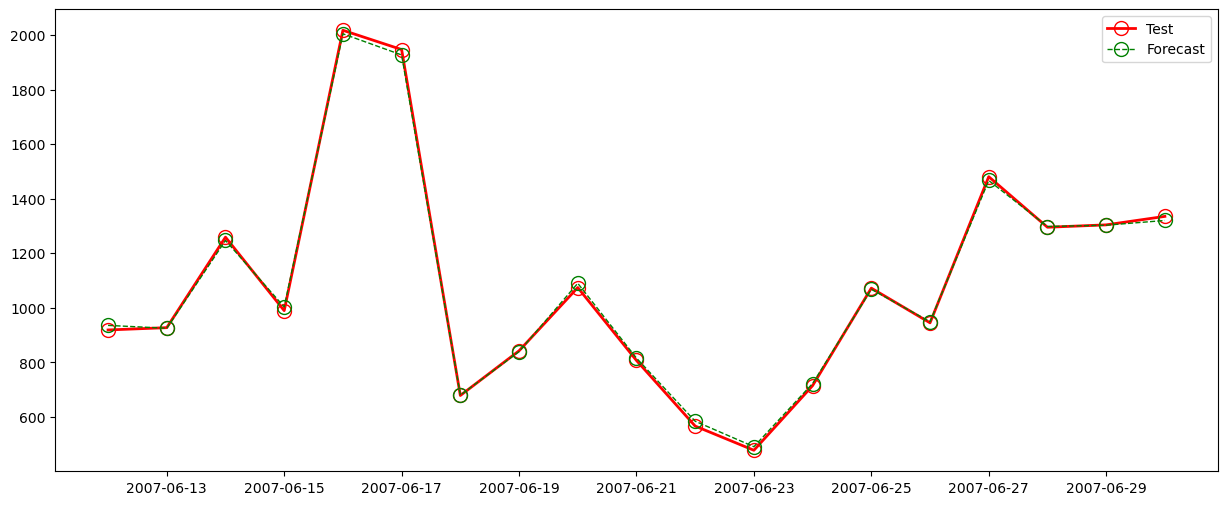

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(test, color='red', linewidth=2, label='Test', marker='o', markersize=10, markerfacecolor='none')
plt.plot(test.index, forecast, color='green', linewidth=1, linestyle='--', label='Forecast', marker='o', markersize=10, markerfacecolor='none')
plt.legend()
plt.show()

In [29]:
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae:.4f} kilowatts')

Mean Absolute Error: 9.7580 kilowatts


### 4. Usando las variables exógenas y prediciendo un valor a la vez

In [30]:
preds = []
true = []

train_copy = train.copy()
train_exog_copy = train_exog.copy()

for i in range(len(test)):
    model = ARIMA(train_copy.values, order=best_params['order'], seasonal_order=best_params['seasonal_order'], exog=train_exog_copy)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1, exog=test_exog.iloc[i].values)
    preds.append(forecast)
    true.append(test.iloc[i])
    train_copy.loc[len(train)] = test.iloc[i]
    train_exog_copy.loc[len(train_exog)] = test_exog.iloc[i]

c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kevinm\anaconda3\Lib\

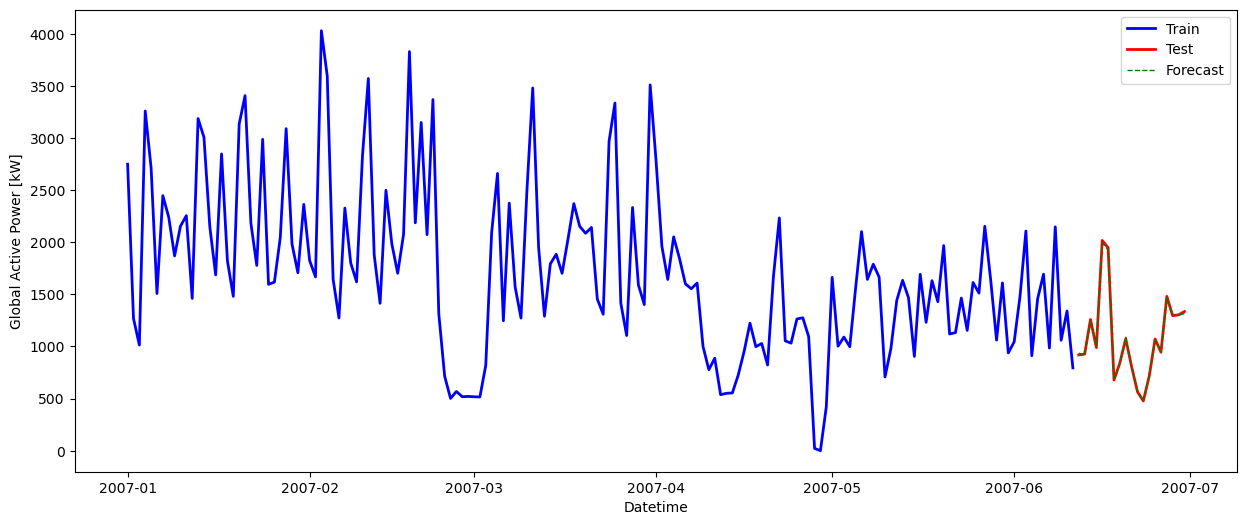

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(test.index, true, color='red', linewidth=2, label='Test')
plt.plot(test.index, preds, color='green', linewidth=1, label='Forecast', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

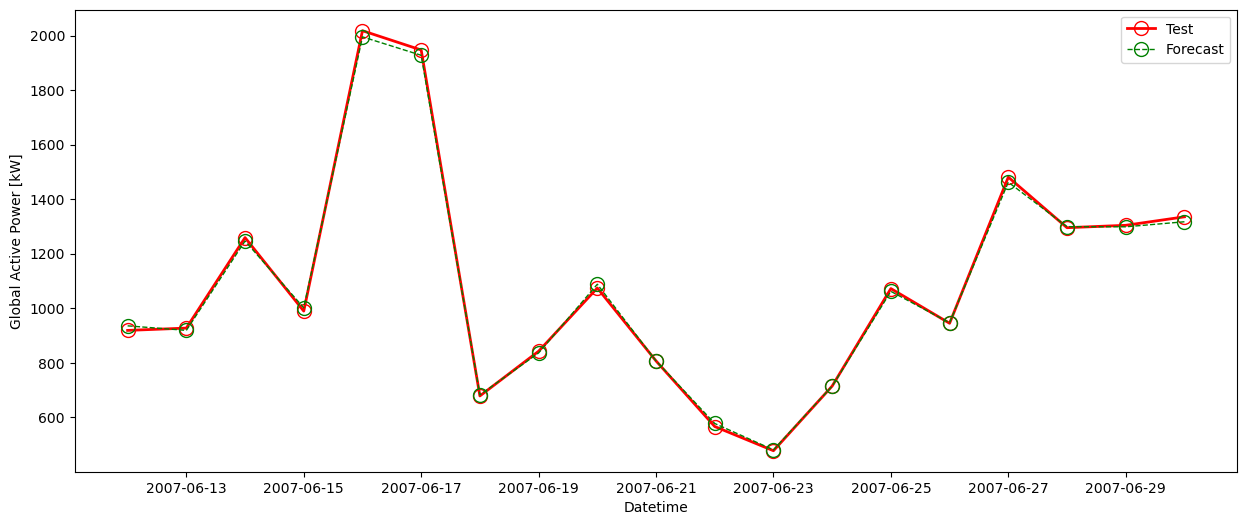

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(test.index, true, color='red', linewidth=2, label='Test', marker='o', markerfacecolor='none', markersize=10)
plt.plot(test.index, preds, color='green', linewidth=1, linestyle='--', label='Forecast', marker='o', markerfacecolor='none', markersize=10)
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

In [33]:
mae = mean_absolute_error(true, preds)
print(f'MAE: {mae:.4f} kilowatts')

MAE: 9.9166 kilowatts


## Análisis de los descriptores

In [34]:
df_exog.head()

,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,
2007-01-01,345785.73,11400.4,0.0,352.0,5880.0
2007-01-02,348399.04,5348.2,0.0,348.0,6562.0
2007-01-03,350722.21,4340.2,0.0,344.0,4765.0
2007-01-04,345240.43,13648.6,1051.0,7597.0,10896.0
2007-01-05,346313.90,11354.6,1483.0,379.0,7602.0


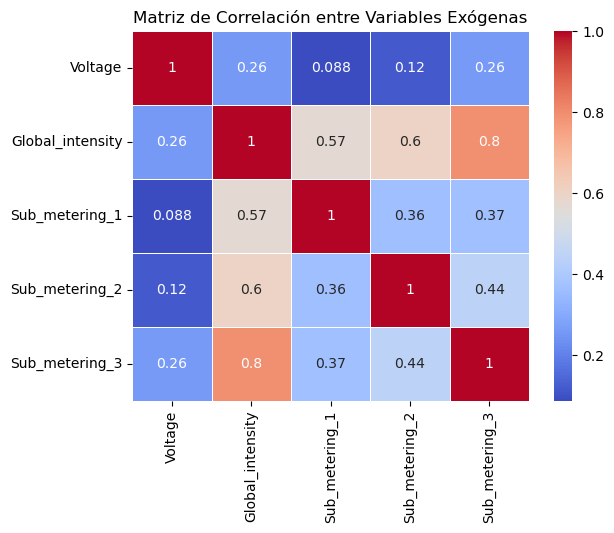

In [35]:
# Calcular la matriz de correlación
correlation_matrix = df_exog.corr()

# Mostrar la matriz de correlación
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Exógenas')
plt.show()

In [36]:
# Información básica del conjunto de datos
data_info = df_exog.info()

# Estadísticas descriptivas
data_description = df_exog.describe()

# Verificar valores faltantes
missing_values = df_exog.isnull().sum()

data_info, data_description, missing_values


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2007-01-01 to 2007-06-30
Freq: D
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Voltage           181 non-null    float64
 1   Global_intensity  181 non-null    float64
 2   Sub_metering_1    181 non-null    float64
 3   Sub_metering_2    181 non-null    float64
 4   Sub_metering_3    181 non-null    float64
dtypes: float64(5)
memory usage: 8.5 KB


(None,
              Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
 count     181.000000        181.000000      181.000000      181.000000   
 mean   339477.191602       7060.002210     1891.011050     2370.872928   
 std     39121.799465       3313.513319     1847.909822     2338.675941   
 min         0.000000          0.000000        0.000000        0.000000   
 25%    339832.220000       4618.400000      209.000000      487.000000   
 50%    345798.590000       6751.600000     1336.000000     1469.000000   
 75%    346782.160000       8857.800000     3176.000000     3859.000000   
 max    350722.210000      17015.000000    10346.000000    12109.000000   
 
        Sub_metering_3  
 count      181.000000  
 mean      8276.325967  
 std       3995.903260  
 min          0.000000  
 25%       5106.000000  
 50%       8217.000000  
 75%      11239.000000  
 max      19509.000000  ,
 Voltage             0
 Global_intensity    0
 Sub_metering_1      0
 Sub_metering_2      

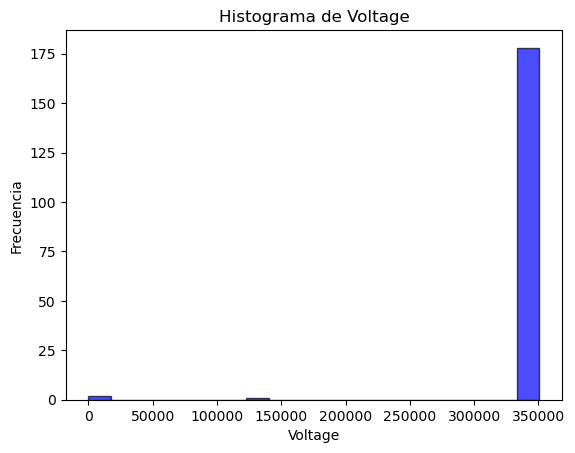

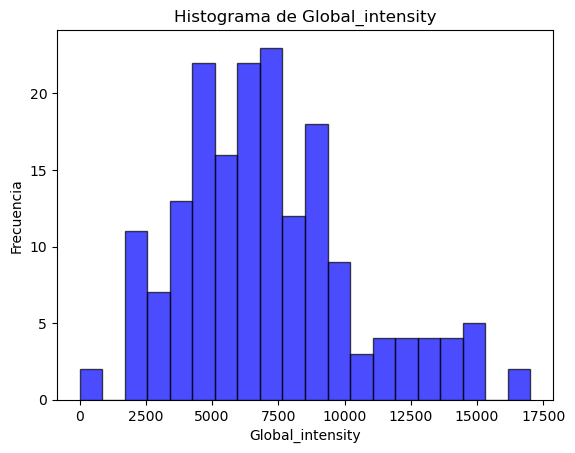

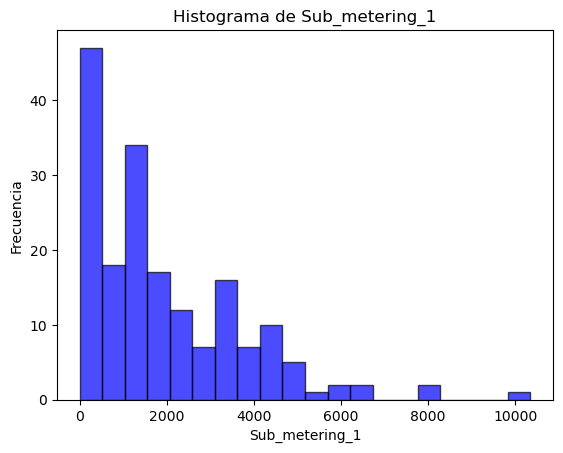

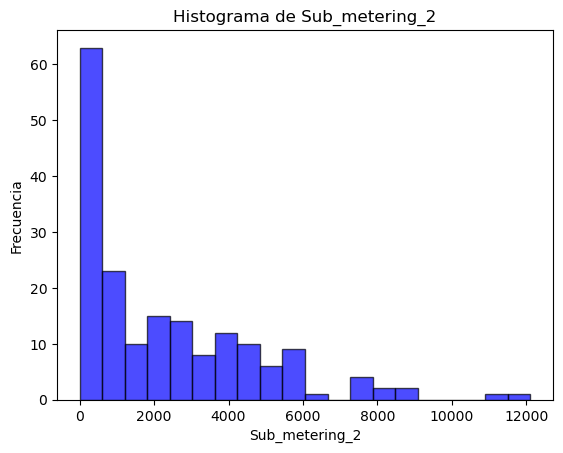

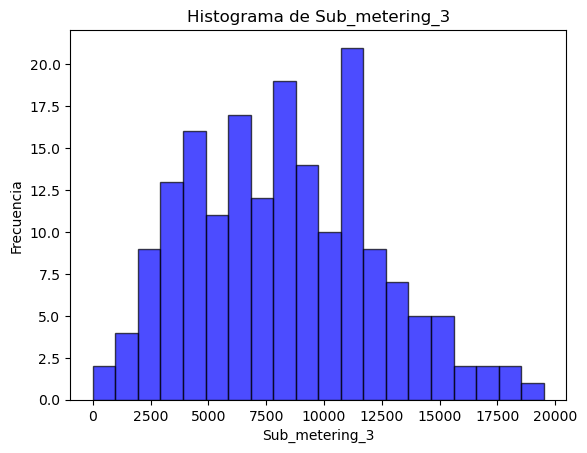

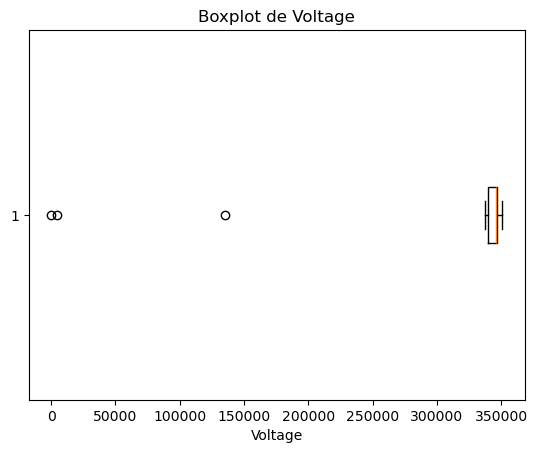

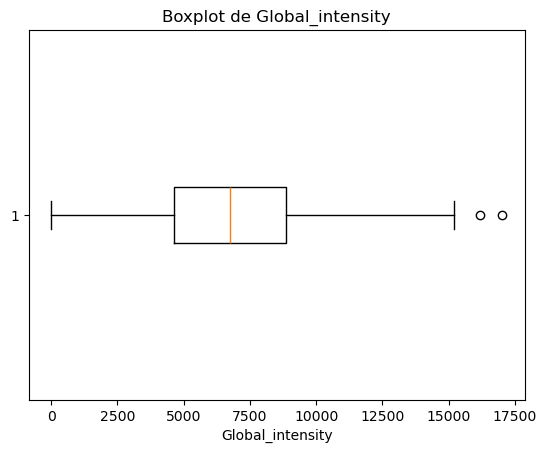

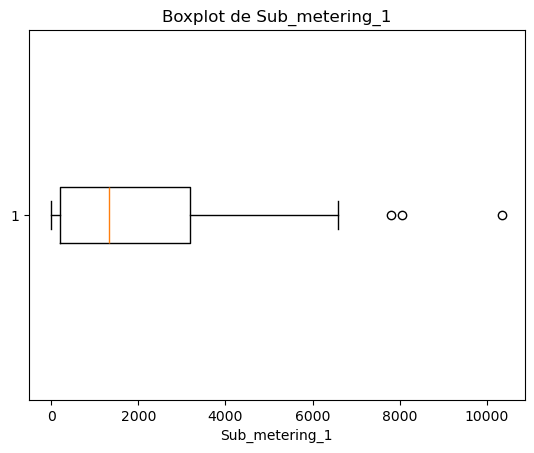

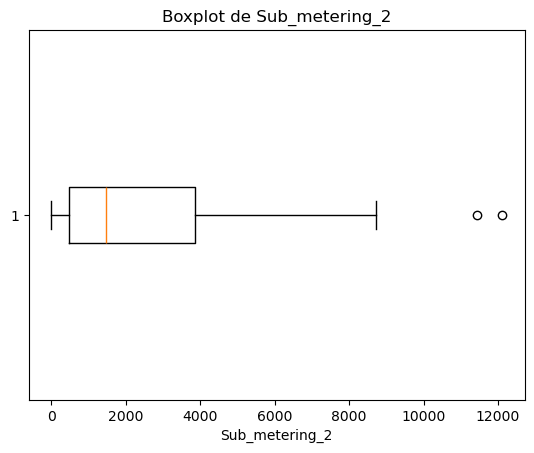

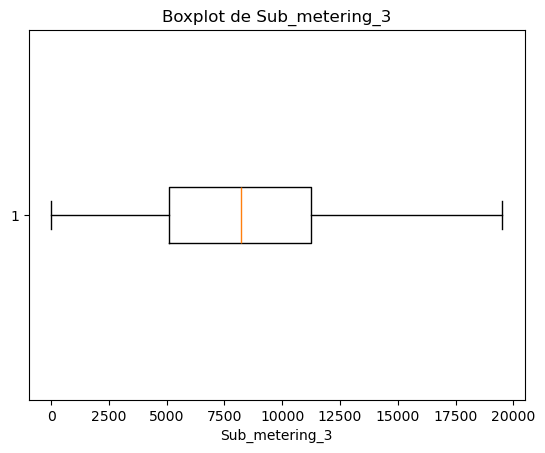

In [37]:
# Plot histogramas de las variables exógenas

for column in df_exog.columns:
    plt.hist(df_exog[column], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
    
# boxplot de las variables exógenas
for column in df_exog.columns:
    plt.figure()
    plt.boxplot(df_exog[column], vert=False)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

In [38]:
merged_data = pd.merge(df, df_exog, on='Datetime', how='inner')
merged_data.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2007-01-01,2749.004,345785.73,11400.4,0.0,352.0,5880.0
2007-01-02,1269.236,348399.04,5348.2,0.0,348.0,6562.0
2007-01-03,1014.054,350722.21,4340.2,0.0,344.0,4765.0
2007-01-04,3259.412,345240.43,13648.6,1051.0,7597.0,10896.0
2007-01-05,2713.364,346313.90,11354.6,1483.0,379.0,7602.0


In [39]:
response_var = 'Global_active_power'
independent_vars = merged_data.columns.difference([response_var])

correlations = merged_data[independent_vars].corrwith(merged_data[response_var])

correlations

Global_intensity    0.999529
Sub_metering_1      0.558052
Sub_metering_2      0.596653
Sub_metering_3      0.798094
Voltage             0.254038
dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression

r_squared = {}
for var in independent_vars:
    X = merged_data[[var]].values
    y = merged_data[response_var].values
    model = LinearRegression()
    model.fit(X, y)
    r_squared[var] = model.score(X, y)
    
results = pd.DataFrame({
    'Correlation': correlations,
    'R-Squared': pd.Series(r_squared)
}).sort_values(by='R-Squared', ascending=False)

results

,Correlation,R-Squared
Global_intensity,0.999529,0.999058
Sub_metering_3,0.798094,0.636954
Sub_metering_2,0.596653,0.355995
Sub_metering_1,0.558052,0.311422
Voltage,0.254038,0.064536


In [41]:
predictor_var = results.index[0]
predictor_var

'Global_intensity'

In [42]:
arima_model = ARIMA(train, order=best_params['order'], seasonal_order=best_params['seasonal_order'], exog=train_exog[[predictor_var]])
arima_model_fit = arima_model.fit()

# rango de confianza de los fitted values
confidence_interval = arima_model_fit.get_prediction(start=0, end=len(train)-1, exog=train_exog[[predictor_var]]).conf_int()

c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


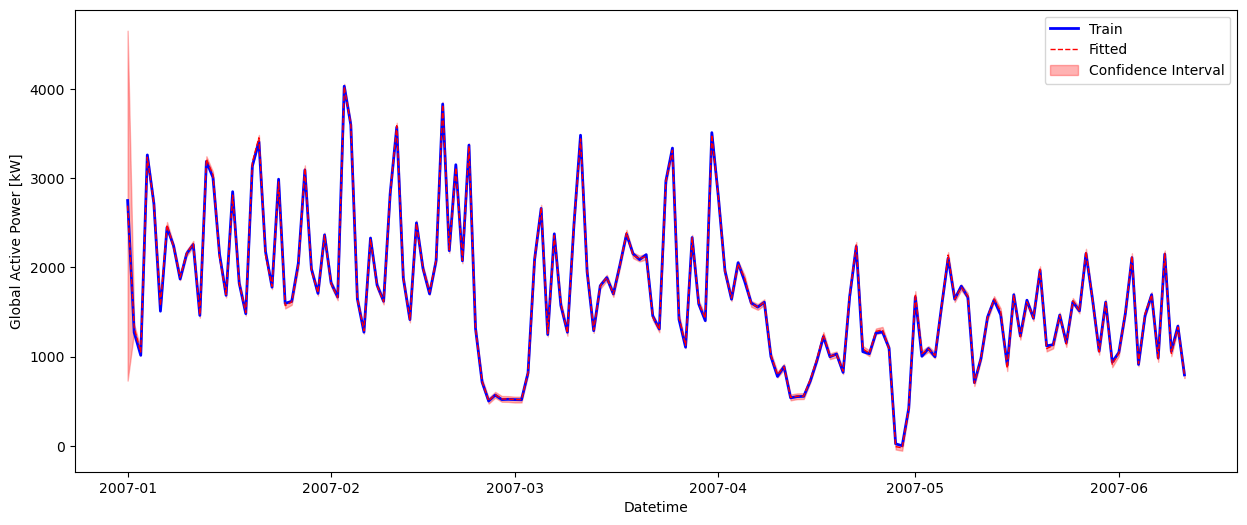

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(train, color='blue', linewidth=2, label='Train')
plt.plot(arima_model_fit.fittedvalues, color='red', label='Fitted', linestyle='--', linewidth=1)
plt.fill_between(train.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='red', alpha=0.3, label='Confidence Interval')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

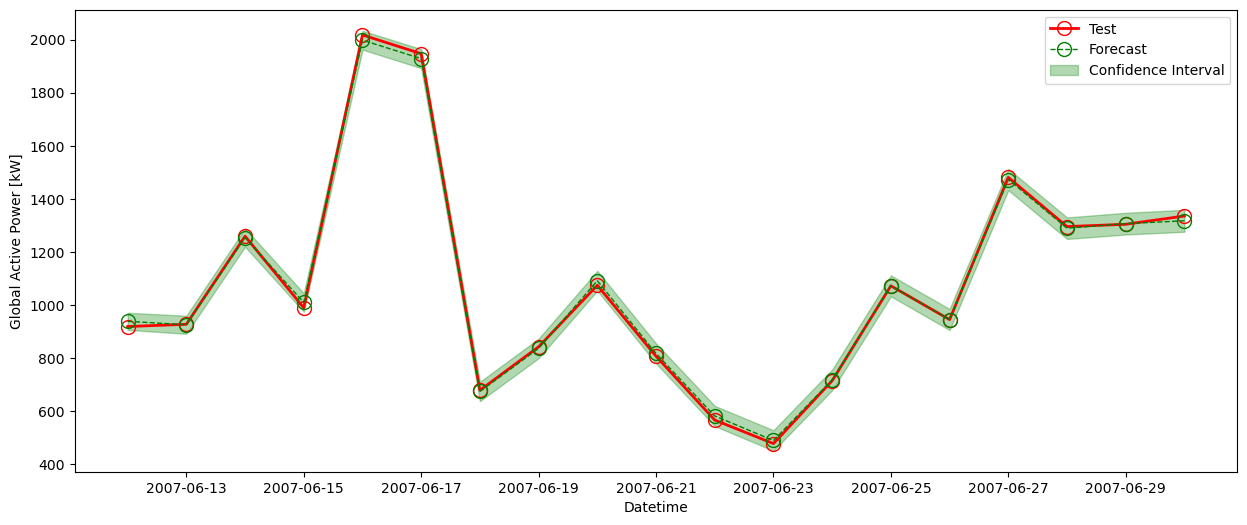

In [44]:
forecast = arima_model_fit.forecast(steps=len(test), exog=test_exog[[predictor_var]])
confidence_interval = arima_model_fit.get_forecast(steps=len(test), exog=test_exog[[predictor_var]]).conf_int()

plt.figure(figsize=(15, 6))
plt.plot(test, color='red', linewidth=2, label='Test', marker='o', markersize=10, markerfacecolor='none')
plt.plot(test.index, forecast, color='green', linewidth=1, linestyle='--', label='Forecast', marker='o', markersize=10, markerfacecolor='none')
plt.fill_between(test.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='green', alpha=0.3, label='Confidence Interval')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power [kW]')
plt.legend()
plt.show()

In [45]:
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae:.4f} kilowatts')

Mean Absolute Error: 9.8553 kilowatts


In [46]:
# Calcular la norma 2 de la resta de las predicciones menos los valores reales
error_norm = np.linalg.norm(np.array(forecast).flatten() - np.array(test).flatten(), 2)

# Calcular la norma 2 de los valores reales
true_norm = np.linalg.norm(np.array(test).flatten(), 2)

# Calcular el error relativo
relative_error = error_norm / true_norm

# Determinar si el error es menor al 5%
if relative_error < 0.05:
    print(f'La variable sirve para predecir correctamente el consumo. Error relativo: {relative_error:.4f}')
else:
    print(f'La variable no sirve para predecir correctamente el consumo. Error relativo: {relative_error:.4f}')

La variable sirve para predecir correctamente el consumo. Error relativo: 0.0105


In [47]:
relative_errors = {}

for var in independent_vars:
    arima_model = ARIMA(train, order=best_params['order'], seasonal_order=best_params['seasonal_order'], exog=train_exog[[var]])
    arima_model_fit = arima_model.fit()
    forecast = arima_model_fit.forecast(steps=len(test), exog=test_exog[[var]])
    
    # Calcular la norma 2 de la resta de las predicciones menos los valores reales
    error_norm = np.linalg.norm(np.array(forecast).flatten() - np.array(test).flatten(), 2)
    
    # Calcular la norma 2 de los valores reales
    true_norm = np.linalg.norm(np.array(test).flatten(), 2)
    
    # Calcular el error relativo
    relative_error = error_norm / true_norm
    
    # Determinar si el error es menor al 5%
    five_percent = 'Yes' if relative_error < 0.05 else 'No'
    
    relative_errors[var] = {
        'Relative Error': relative_error,
        'Error < 5%': five_percent
    }

# Crear un DataFrame con los resultados
relative_errors_df = pd.DataFrame.from_dict(relative_errors, orient='index', columns=['Relative Error', 'Error < 5%'])
relative_errors_df = relative_errors_df.sort_values(by='Relative Error')

relative_errors_df

c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\kevinm\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Relative Error,Error < 5%
Global_intensity,0.010474,Yes
Sub_metering_3,0.171136,No
Sub_metering_1,0.266880,No
Sub_metering_2,0.324717,No
Voltage,0.437296,No
